## 소리 데이터에 대한 이해

In [2]:
import librosa

In [3]:
import sounddevice as sd

In [4]:
example_file_path = librosa.ex('trumpet')
print(f'예제 파일은 다음 위치에 있습니다\n파일 경로: {example_file_path}')

예제 파일은 다음 위치에 있습니다
파일 경로: /Users/henris/Library/Caches/librosa/sorohanro_-_solo-trumpet-06.ogg


In [5]:
y, sr = librosa.load(example_file_path)

In [6]:
sd.play(y)

In [7]:
print(f'y : {y}\nsampling_rate : {sr}')

y : [-1.4068224e-03 -4.4607223e-04 -4.1098078e-04 ...  7.9623060e-06
 -3.0417003e-05  1.2765067e-05]
sampling_rate : 22050


In [8]:
print(f'y는 {len(y)} 길이의 벡터')

y는 117601 길이의 벡터


In [9]:
print(f'y의 앞 20개 값은?\n{y[:20]}')

y의 앞 20개 값은?
[-1.4068224e-03 -4.4607223e-04 -4.1098078e-04  9.9920901e-05
  4.3150427e-05 -1.7485349e-04 -3.6783377e-04  1.4553138e-04
  5.0557830e-04  1.4929948e-03  1.8555219e-03  9.2913158e-04
 -4.0743878e-04 -2.0390339e-03 -1.2686776e-03 -5.3472776e-04
  8.9941407e-04  9.7593543e-04  1.0019976e-03 -1.2960718e-03]


In [10]:
print(f'y는 {len(y) / sr} 초의 신호 벡터!')

y는 5.333378684807256 초의 신호 벡터!


In [11]:
from matplotlib import pyplot as plt

In [12]:
sr

22050

In [13]:
x = [i / sr for i in range(len(y))]

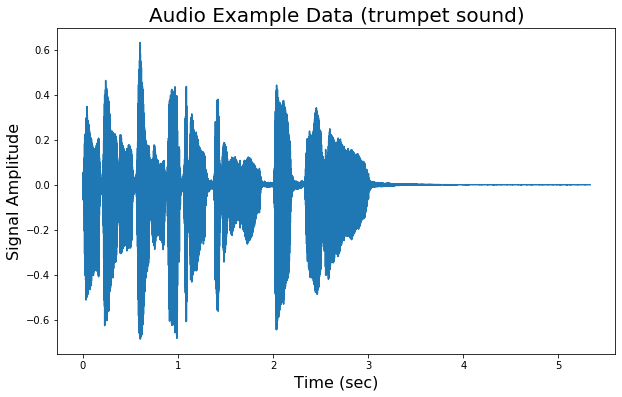

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('Audio Example Data (trumpet sound)', fontsize=20)
plt.xlabel('Time (sec)', fontsize=16)
plt.ylabel('Signal Amplitude', fontsize=16)
plt.show()

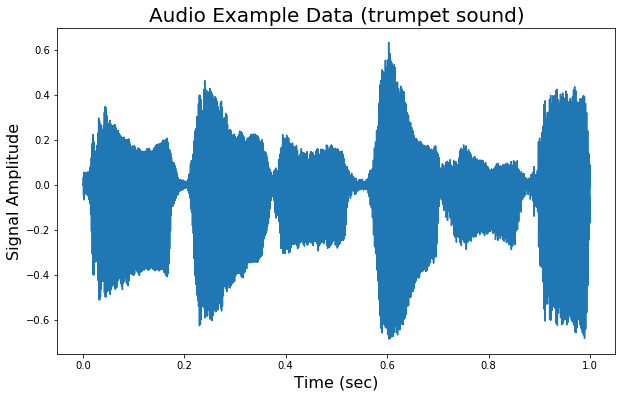

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(x[:sr], y[:sr])
plt.title('Audio Example Data (trumpet sound)', fontsize=20)
plt.xlabel('Time (sec)', fontsize=16)
plt.ylabel('Signal Amplitude', fontsize=16)
plt.show()

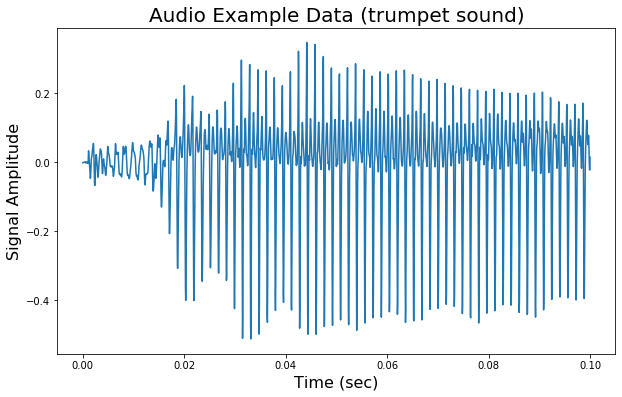

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(x[: sr // 10], y[: sr // 10])
plt.title('Audio Example Data (trumpet sound)', fontsize=20)
plt.xlabel('Time (sec)', fontsize=16)
plt.ylabel('Signal Amplitude', fontsize=16)
plt.show()

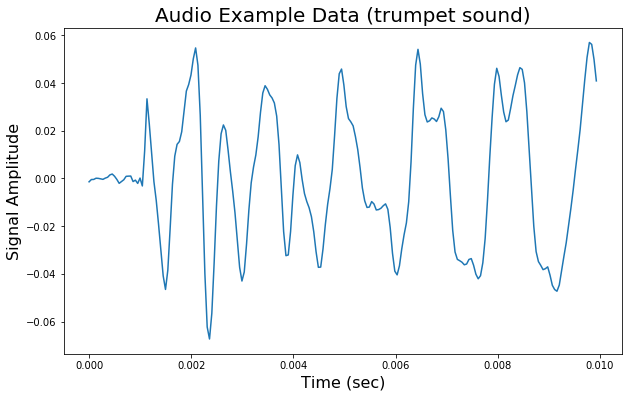

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(x[: sr // 100], y[: sr // 100])
plt.title('Audio Example Data (trumpet sound)', fontsize=20)
plt.xlabel('Time (sec)', fontsize=16)
plt.ylabel('Signal Amplitude', fontsize=16)
plt.show()

In [18]:
sd.play(y)

## Frame Processing

In [19]:
import librosa
import pandas as pd
import numpy as np

In [20]:
example_audio_path = './example/꿩+klankbeeld.wav'
example_label_path = './example/꿩+klankbeeld.txt'

frame_size = 1
stride = 0.2

In [21]:
example_audio, example_sr = librosa.load(example_audio_path)

In [22]:
print(
    f'audio 벡터 길이 : {len(example_audio)}\
    \naudio 파일 길이 : {len(example_audio) / example_sr} 초'
    
)

audio 벡터 길이 : 85604    
audio 파일 길이 : 3.882267573696145 초


In [23]:
example_label = pd.read_csv(
    example_label_path, sep='\t', names=['start(s)', 'end(s)', 'label']
)

In [24]:
print(
    f'label :\
    \n{example_label}'
)

label :    
   start(s)    end(s)  label
0   0.00000  1.191226      0
1   1.33714  3.210092      0


In [25]:
idx = example_label['end(s)'] - example_label['start(s)'] > frame_size  # (1)

example_label = example_label[idx]

In [26]:
each_n_frames = (
    np.floor(
        (
            (
                (
                    example_label['end(s)'] - example_label['start(s)']
                ) - frame_size
            ) / stride
        ) + 1
    )
).astype(int).values

In [27]:
total_n_frames = sum(each_n_frames)

In [28]:
print(f'각각의 구간마다 프레임 개수 : {each_n_frames}')
print(f'총 구간의 프레임 개수 : {total_n_frames}')

각각의 구간마다 프레임 개수 : [1 5]
총 구간의 프레임 개수 : 6


In [29]:
frame_vectors = np.zeros((int(total_n_frames), frame_size * example_sr))
target_vectors = np.zeros((int(total_n_frames)))

In [30]:
print(
    f'frame_vectors의 shape : {frame_vectors.shape}\
    \ntarget_vectors의 shape : {target_vectors.shape}'
)

frame_vectors의 shape : (6, 22050)    
target_vectors의 shape : (6,)


In [31]:
for i in range(len(frame_vectors)):
    print(f'{i}-th frame vector[:5] : {frame_vectors[i][:5]}')
print(f'target_vectors : {target_vectors}')

0-th frame vector[:5] : [0. 0. 0. 0. 0.]
1-th frame vector[:5] : [0. 0. 0. 0. 0.]
2-th frame vector[:5] : [0. 0. 0. 0. 0.]
3-th frame vector[:5] : [0. 0. 0. 0. 0.]
4-th frame vector[:5] : [0. 0. 0. 0. 0.]
5-th frame vector[:5] : [0. 0. 0. 0. 0.]
target_vectors : [0. 0. 0. 0. 0. 0.]


In [32]:
print(
    f'frame vectors의 shape : {frame_vectors.shape}'
)

frame vectors의 shape : (6, 22050)


In [33]:
current_idx = 0

for i, (start, end, y) in example_label.iterrows():
    for j in range(each_n_frames[i]):
        start_idx = int((start + j * stride) * example_sr)
        end_idx = start_idx + frame_size * example_sr
        frame_vectors[current_idx] = example_audio[start_idx:end_idx]
        target_vectors[current_idx] = y
        current_idx += 1

In [34]:
print(
    f'frame_vectors의 shape : {frame_vectors.shape}\
    \ntarget_vectors의 shape : {target_vectors.shape}'
)

frame_vectors의 shape : (6, 22050)    
target_vectors의 shape : (6,)


In [35]:
for i in range(len(frame_vectors)):
    print(f'{i}-th frame vector[:5] : {frame_vectors[i][:5]}')
print(f'target_vectors : {target_vectors}')

0-th frame vector[:5] : [-0.00265772  0.00103548  0.00018767 -0.00690498 -0.00465354]
1-th frame vector[:5] : [0.00462255 0.00474213 0.00503599 0.00415416 0.00215303]
2-th frame vector[:5] : [0.01052688 0.01409292 0.0158177  0.01223616 0.00895123]
3-th frame vector[:5] : [-0.00730914 -0.01086354 -0.0084091  -0.01000284 -0.01859629]
4-th frame vector[:5] : [0.05644109 0.06171763 0.05151632 0.03100646 0.016623  ]
5-th frame vector[:5] : [-0.001992   -0.00298869  0.00015296  0.00136695 -0.00181217]
target_vectors : [0. 0. 0. 0. 0. 0.]


## Feature Extraction: Mel Spectrogram

In [36]:
from matplotlib import pyplot as plt
import sounddevice as sd
from librosa.display import specshow

In [37]:
y = frame_vectors[1]

In [38]:
sd.play(y)

In [39]:
print(
    f'벡터의 shape : {y.shape}\
    \n벡터의 대략적인 모습은.. :\n {y}'
)

벡터의 shape : (22050,)    
벡터의 대략적인 모습은.. :
 [ 0.00462255  0.00474213  0.00503599 ... -0.00755864 -0.00101585
  0.00437011]


In [40]:
x = [t / example_sr for t in range(len(y))]

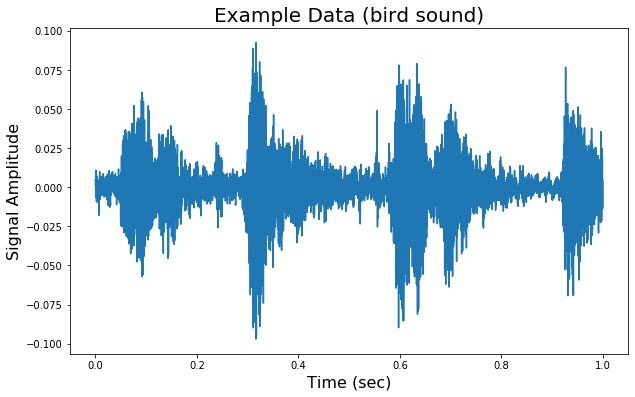

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('Example Data (bird sound)', fontsize=20)
plt.xlabel('Time (sec)', fontsize=16)
plt.ylabel('Signal Amplitude', fontsize=16)
plt.show()


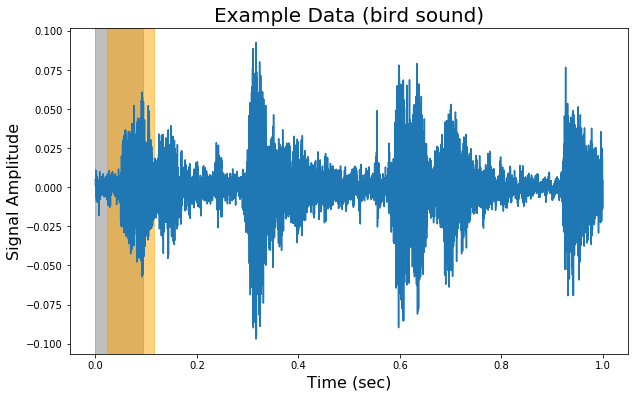

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('Example Data (bird sound)', fontsize=20)
plt.xlabel('Time (sec)', fontsize=16)
plt.ylabel('Signal Amplitude', fontsize=16)
plt.axvspan(xmin=0, xmax=2048 / example_sr, color='gray', alpha=0.5)
plt.axvspan(
    xmin=512 / example_sr, xmax=(2048 + 512) / example_sr,
    color='orange', alpha=0.5
)
plt.show()

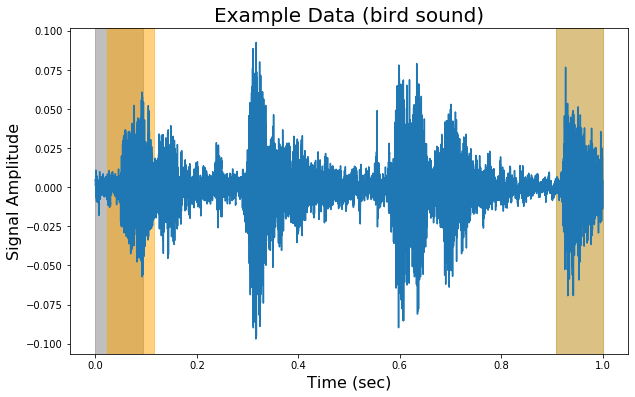

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('Example Data (bird sound)', fontsize=20)
plt.xlabel('Time (sec)', fontsize=16)
plt.ylabel('Signal Amplitude', fontsize=16)
plt.axvspan(
    xmin=0, xmax=2048 / example_sr, color='gray', alpha=0.5
)
plt.axvspan(
    xmin=512 / example_sr, xmax=(2048 + 512 ) / example_sr,
    color='orange', alpha=0.5
)
plt.axvspan(
    xmin=(example_sr - 2048) / example_sr, xmax=example_sr / example_sr,
    color='darkgoldenrod', alpha=0.5
)
plt.show()

In [44]:
S = librosa.feature.melspectrogram(y=y, sr=example_sr)

In [45]:
S.shape

(128, 44)

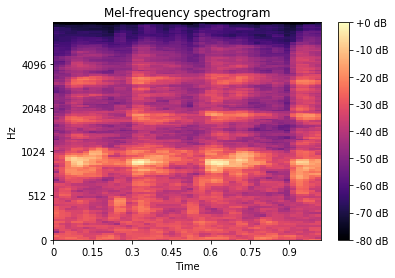

In [46]:
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = specshow(
    S_dB, x_axis='time', y_axis='mel',
    sr=example_sr, fmax=8000, ax=ax
)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
plt.show()

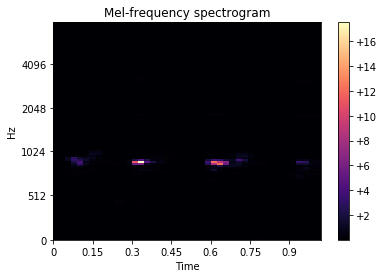

In [47]:
fig, ax = plt.subplots()
img = specshow(
    S, x_axis='time', y_axis='mel',
    sr=example_sr, fmax=8000, ax=ax
)
fig.colorbar(img, ax=ax, format='%+2.0f')
ax.set(title='Mel-frequency spectrogram')
plt.show()

In [48]:
print(
    f'1초 신호 데이터는 다음과 같이 변합니다.\
    \nBefore shape (signal) : {y.shape}\
    \nAfter shape (Mel Spectrogram) : {S_dB.shape}'
)

1초 신호 데이터는 다음과 같이 변합니다.    
Before shape (signal) : (22050,)    
After shape (Mel Spectrogram) : (128, 44)


In [49]:
S_power = librosa.db_to_power(S_dB)

In [50]:
sd.play(y, 22050)

In [51]:
sd.play(librosa.feature.inverse.mel_to_audio(S_power), 22050)

In [52]:
sd.play(librosa.feature.inverse.mel_to_audio(S_dB), 22050)

## 레이블 데이터 정리

In [53]:
from os import listdir
from os.path import join, splitext
import pandas as pd

In [54]:
label_path = './data/labels/'
label_files = [
    f for f in listdir(label_path)
    if splitext(join(label_path, f))[-1] == '.txt'
]

In [55]:
print(
    f'label file 목록 예시 : {label_files[:3]}'
)

label file 목록 예시 : ['gun5.txt', 'maleyell.txt', 'aarrgghh.txt']


In [56]:
list_file_fn = 'file_list.xlsx'  # (1)
file_n = 0
with pd.ExcelWriter(list_file_fn) as writer:  # (2)
    audio_names = []  # (3)
    for i, file_name in enumerate(label_files):
        if file_name[:-3] + 'wav' not in listdir('./data/raw_data/'):
            raise FileNotFoundErrorError('file not match')
        if file_name[:-3] + 'wav' in listdir('./data/raw_data/'):
            temp = pd.read_csv(label_path + file_name, sep='\t', header=None)
            temp.columns = ['start(s)', 'end(s)', 'label']
            temp.to_excel(writer, index=False, sheet_name=str(file_n))  # (4)
            file_n += 1
            audio_names.append(file_name[:-3] + 'wav')  # (5)
        if i == len(label_files) - 1:  # (6)
            pd.DataFrame(
                audio_names, columns=['audio_name']
            ).to_excel(writer, sheet_name='list')

## 전체 데이터 전처리

In [57]:
import time
import math

import numpy as np
import pandas as pd
from tqdm import tqdm
import librosa
from torch.utils.data import Dataset, DataLoader

In [58]:
def load_label_data(file_path, i, frame_size):
    audio_label = pd.read_excel(file_path, sheet_name=str(i))  # (1)
    audio_label['label'] = audio_label['label'].apply(
        lambda x: int(str(x)[0])
    )
 
    audio_label = np.array(audio_label)  # (2)
    audio_label = audio_label[
        (audio_label[:, 1] - audio_label[:, 0] > frame_size)
    ]  # (3)
    return audio_label
 
def load_sound_data(file_path, sampling_rate):
    audio, sr = librosa.load(file_path, sr=sampling_rate)  # (4)
    return audio, sr

In [59]:
def process_frame(audio, sr, label, frame_size=1, stride=0.2):
    n = np.sum(
        np.floor(
            (
                (label[:, 1] - label[:, 0]) - frame_size
            ) / stride + frame_size
        )
    )  # (1)
 
    frame_vector = np.zeros((int(n), frame_size * sr))  # (2)
    target_vector = np.zeros((int(n), 1))  # (3)
 
    i = 0
 
    for temp_label in label:  # (4)
        start = temp_label[0]  # (5)
        end = temp_label[1]  # (6)
        y = temp_label[2]  # (7)
 
        eter = int(
            np.floor((((end - start) - frame_size) / stride) + 1)
        )  # (8)
 
        for j in range(eter):  # (9)
            start_idx = int((start + j * stride) * sr)
            end_idx = start_idx + frame_size * sr
            frame_vector[i] = audio[start_idx:end_idx]  # (10)
            target_vector[i] = y  # (11)
            i += 1
    return frame_vector, target_vector

In [60]:
def extract_mel_feature(frame_vector, sr, n_mels, st=512):
    mel_feature = librosa.feature.melspectrogram(
        y=frame_vector, sr=sr, n_mels=n_mels, hop_length=st
    )  # (1)
    mel_feature = librosa.core.power_to_db(
        mel_feature, ref=np.max
    )  # (2)
    return mel_feature

In [61]:
def extract_mel_power_feature(frame_vector, sr, n_mels, st=512):
    mel_feature = librosa.feature.melspectrogram(
        y=frame_vector, sr=sr, n_mels=n_mels, hop_length=st
    )  # (1)
    return mel_feature

In [70]:
sr = 22050
frame_size = 1
stride = 0.2
n_mels = 64
n_feature = 34
short_time = 512
 
file_list = pd.read_excel('./file_list.xlsx', sheet_name='list')  # (1)
 
frame_vectors = []
label_vectors = []
idx_count = []
 
for file_i, file_name in enumerate(file_list['audio_name']):  # (2)
    if file_i % 10 == 0:
        print(f'{file_i}-th 파일을 처리하고 있습니다.')
 
    label_data_temp = load_label_data(
        './file_list.xlsx', file_i, frame_size
    )  # (3)
 
    if len(label_data_temp) == 0:  # (4)
        idx_count.append(0)
        continue
 
    audio_path = './data/raw_data/' + file_name
    audio_data_temp, _ = load_sound_data(audio_path, sr)  # (5)
 
    frame_vector, label_vector = process_frame(
        audio=audio_data_temp, sr=sr, label=label_data_temp,
        frame_size=frame_size, stride=stride
    )  # (6)
    frame_vectors.append(frame_vector)
    label_vectors.append(label_vector)
    
    idx_count.append(frame_vector.shape[0])
    
frame_vectors = np.concatenate(frame_vectors)  # (7)
label_vectors = np.concatenate(label_vectors)

0-th 파일을 처리하고 있습니다.
10-th 파일을 처리하고 있습니다.
20-th 파일을 처리하고 있습니다.
30-th 파일을 처리하고 있습니다.
40-th 파일을 처리하고 있습니다.
50-th 파일을 처리하고 있습니다.
60-th 파일을 처리하고 있습니다.
70-th 파일을 처리하고 있습니다.
80-th 파일을 처리하고 있습니다.
90-th 파일을 처리하고 있습니다.
100-th 파일을 처리하고 있습니다.
110-th 파일을 처리하고 있습니다.
120-th 파일을 처리하고 있습니다.
130-th 파일을 처리하고 있습니다.
140-th 파일을 처리하고 있습니다.
150-th 파일을 처리하고 있습니다.
160-th 파일을 처리하고 있습니다.
170-th 파일을 처리하고 있습니다.
180-th 파일을 처리하고 있습니다.
190-th 파일을 처리하고 있습니다.
200-th 파일을 처리하고 있습니다.
210-th 파일을 처리하고 있습니다.
220-th 파일을 처리하고 있습니다.
230-th 파일을 처리하고 있습니다.
240-th 파일을 처리하고 있습니다.
250-th 파일을 처리하고 있습니다.


In [71]:
print(
    f'label vectors 의 shape: {label_vectors.shape}\
    \n비명 갯수 : {int(sum(label_vectors == 1))}\
    \n비명 아닌 갯수 : {int(sum(label_vectors == 0))}'
)

label vectors 의 shape: (6090, 1)    
비명 갯수 : 2237    
비명 아닌 갯수 : 3853


In [72]:
mel_features = []
for frame_vector in frame_vectors:
    mel_feature = extract_mel_feature(
        frame_vector=frame_vector, sr=sr, n_mels=n_mels
    )
    mel_features.append(mel_feature)
mel_features = np.stack(mel_features)
print(f'mel spectrogram shape: {mel_features.shape}')

mel spectrogram shape: (6090, 64, 44)


In [74]:
train_ratio = 0.7  # (1)

total_n = frame_vectors.shape[0]  # (2)
train_n = int(total_n * train_ratio)  # (3)

train_idxes = np.random.choice(total_n, train_n, replace=False)  # (4)

train_mask = np.zeros(shape=total_n, dtype=bool)  # (5)
train_mask[train_idxes] = True  # (6)

In [75]:
print(train_mask[:10])

[ True False  True  True False False  True  True False False]


In [77]:
train_idxes[:10]

array([5902, 5484,  508, 4685, 4318, 2591,  438, 4481, 5530, 1608])

In [ ]:
# idxes = []
# now = 0
# for i, count in enumerate(idx_count):
#     idxes.append([j for j in range(now, now + count)])
#     now += count

In [ ]:
# import random
# random.shuffle(idxes)
# # idxes[:5]

In [ ]:
# train_idxes = []
# for idx in idxes:
#     train_idxes.extend(idx)
#     if len(train_idxes) > train_idx:
#         break 

In [ ]:
# len(train_idxes)

In [78]:
train_mel_features = mel_features[train_mask]
valid_mel_features = mel_features[~train_mask]

train_label_vectors = label_vectors[train_mask]
valid_label_vectors = label_vectors[~train_mask]

In [79]:
print(sum(train_label_vectors==0))
print(sum(train_label_vectors==1))

[2703]
[1560]


In [80]:
print(sum(valid_label_vectors==0))
print(sum(valid_label_vectors==1))

[1150]
[677]


## PyTorch 데이터셋 & 로더 구현

In [81]:
class ScreamDataset(Dataset):
    def __init__(self, x, y):
        self.audio_features = x
        self.labels = y
    
    def __len__(self):
        return len(self.audio_features)
    
    def __getitem__(self, idx):
        audio_feature = torch.FloatTensor(self.audio_features[idx])
        audio_feature = audio_feature.unsqueeze(0)
        label = self.labels[idx]
        return (audio_feature, label)

In [82]:
batch_size = 128
learning_rate = 0.001
epochs = 10

In [83]:
train_dataset = ScreamDataset(
    train_mel_features, train_label_vectors
)  # (1)
train_loader = DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True
)  # (2)

In [84]:
valid_dataset = ScreamDataset(
    valid_mel_features, valid_label_vectors
)  # (1)
valid_loader = DataLoader(
    valid_dataset, batch_size=batch_size, shuffle=False
)  # (2)

## 모델 클래스 구현

In [85]:
import torch
from torch import nn

In [86]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = nn.Sequential(
    # |x| = (n, 1, 64, 44)
    nn.Conv2d(
        in_channels=1,
        out_channels=32,
        kernel_size=(64, 1),
    ),
    # |x| = (n, 32, 1, 44)
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.Dropout2d(p=0.3),
    nn.Conv2d(
        in_channels=32,
        out_channels=64,
        kernel_size=(1, 9),
        stride=4
    ),
    # |x| = (n, 64, 1, 9)
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.Dropout2d(p=0.3),
    nn.Flatten(),
    # |x| = (n, 64 * 1 * 9)
    nn.Linear(64 * 1 * 9, 1),
    # |x| = (n, 1)
).to(device)

## 모델 학습

In [87]:
import torch
from torch import optim
from sklearn.metrics import f1_score, accuracy_score

In [88]:
criterion = nn.BCEWithLogitsLoss()  # (1)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # (2)

In [89]:
train_n = len(train_dataset)
valid_n = len(valid_dataset)

for e in range(100):
    # init metrics for this epoch  # (1)
    train_loss = 0
    train_acc = 0
    train_f1_score = 0
    valid_loss = 0
    valid_acc = 0
    valid_f1_score = 0
    
    # train part
    model.train()  # (2)
    for audio_feature, label in train_loader:
        audio_feature = audio_feature.to(device)  # (3)
        label = label.to(device)
        optimizer.zero_grad()  # (4)
        
        pred = model(audio_feature)  # (5)
        
        loss = criterion(pred, label)  # (6)
        loss.backward()  # (7)
        optimizer.step()  # (8)

        pred = torch.round(torch.sigmoid(pred))  # (9)
        pred = pred.cpu().detach().numpy()  # (10)
        label = label.cpu().detach().numpy()

        acc = accuracy_score(label, pred)  # (11)
        f1 = f1_score(label, pred)

        n = len(label)  # (12)
        train_loss += loss.item() * n
        train_acc += acc.item() * n
        train_f1_score += f1 * n

    # validation part
    model.eval()
    with torch.no_grad():
        for audio_feature, label in valid_loader:
            audio_feature = audio_feature.to(device)
            label = label.to(device)
            
            pred = model(audio_feature)

            loss = criterion(pred, label)

            pred = torch.round(torch.sigmoid(pred))
            pred = pred.cpu().numpy()  # (13)
            label = label.cpu().numpy()
            
            acc = accuracy_score(label, pred)
            f1 = f1_score(label, pred)

            n = len(label)
            valid_acc += acc.item() * n
            valid_loss += loss.item() * n
            valid_f1_score += f1 * n

    # calculate metrics for this epoch  # (14)
    train_loss = f'{train_loss / train_n : .4f}'
    train_acc = f'{train_acc / train_n : .3f}'
    train_f1_score = f'{train_f1_score / train_n : .3f}'    
    valid_loss = f'{valid_loss / valid_n : .4f}'
    valid_acc = f'{valid_acc / valid_n : .3f}'
    valid_f1_score = f'{valid_f1_score / valid_n : .3f}'

    # log metrics
    print(f'Epoch {e+0 : 03}')
    print('      |   loss  |   acc  |   f1   |')
    print(f'TRAIN | {train_loss} | {train_acc} | {train_f1_score} |')
    print(f'VALID | {valid_loss} | {valid_acc} | {valid_f1_score} |')
    print('----------------------------------')
    print()

Epoch  00
      |   loss  |   acc  |   f1   |
TRAIN |  0.4516 |  0.795 |  0.707 |
VALID |  0.3433 |  0.847 |  0.732 |
----------------------------------

Epoch  01
      |   loss  |   acc  |   f1   |
TRAIN |  0.3260 |  0.871 |  0.817 |
VALID |  0.4034 |  0.827 |  0.741 |
----------------------------------

Epoch  02
      |   loss  |   acc  |   f1   |
TRAIN |  0.3111 |  0.875 |  0.824 |
VALID |  0.3563 |  0.860 |  0.727 |
----------------------------------

Epoch  03
      |   loss  |   acc  |   f1   |
TRAIN |  0.2869 |  0.886 |  0.840 |
VALID |  0.2570 |  0.898 |  0.829 |
----------------------------------

Epoch  04
      |   loss  |   acc  |   f1   |
TRAIN |  0.2700 |  0.892 |  0.848 |
VALID |  0.2538 |  0.901 |  0.828 |
----------------------------------

Epoch  05
      |   loss  |   acc  |   f1   |
TRAIN |  0.2583 |  0.897 |  0.854 |
VALID |  0.2378 |  0.901 |  0.837 |
----------------------------------

Epoch  06
      |   loss  |   acc  |   f1   |
TRAIN |  0.2379 |  0.903 |  0.

## 모델 저장

In [90]:
torch.save(model.cpu().state_dict(), 'test.pth')

## 모델 로드

In [91]:
from torch import nn
import torch

In [92]:
model = nn.Sequential(
    nn.Conv2d(
        in_channels=1,
        out_channels=32,
        kernel_size=(64, 1),
    ),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.Dropout2d(p=0.3),
    nn.Conv2d(
        in_channels=32,
        out_channels=64,
        kernel_size=(1, 9),
        stride=4
    ),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.Dropout2d(p=0.3),
    nn.Flatten(),
    nn.Linear(64 * 1 * 9, 1),
)

In [95]:
model.load_state_dict(torch.load('test.pth', map_location='cpu'))

<All keys matched successfully>

## 데모 실행

In [96]:
import sys
from PyQt5 import QtCore
from PyQt5.QtWidgets import QApplication
from demo import MyWindow, MicrophoneRecorder


sampling_rate = 22050  # Hz
chunk_size = 22050  # samples

model_dir = 'test.pth'
model = nn.Sequential(
    nn.Conv2d(
        in_channels=1,
        out_channels=32,
        kernel_size=(64, 1),
    ),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.Dropout2d(p=0.3),
    nn.Conv2d(
        in_channels=32,
        out_channels=64,
        kernel_size=(1, 9),
        stride=4
    ),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.Dropout2d(p=0.3),
    nn.Flatten(),
    nn.Linear(64 * 1 * 9, 1),
)
model.load_state_dict(torch.load(model_dir, map_location='cpu'))

prediction_i = 0
predictions_collection = []


app = QApplication(sys.argv)
myWindow = MyWindow(model=model)
mic = MicrophoneRecorder(myWindow.read_collected)

# time (seconds) between reads
interval = sampling_rate / chunk_size
t = QtCore.QTimer()
t.timeout.connect(mic.read)
t.start(500)  # QTimer takes ms

myWindow.show()
app.exec_()

/Users/henris/.pyenv/versions/3.7.3/envs/scream_detection/lib/python3.7/site-packages/torch/distributed/distributed_c10d.py:125: UserWarning: torch.distributed.reduce_op is deprecated, please use torch.distributed.ReduceOp instead
  def __getattribute__(self, key):


0